# Machine Learning

SENAI Technology College "Mariano Ferraz"
Sao Paulo, 27/08/2022
Postgraduate - Internet of Things

Names of postgraduate students:
Claudinei, Guilherme, Renan

Lecturer:
André and Daniel

Goals: 
Software to train an AI to undestand morse code

Hardware: 

Libraries:
- pandas
- numpy
- os
- random
- matplotlib
- sklearn

Reviews: 
R000 - begin
R001 - implement clustering model

## 1. Prepare dataframes

Import libraries

In [13]:
import pandas as pd
import os

Prepare Renan's dataframe

In [14]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)          

Prepare Claudinei's dataframe

In [15]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)    

Prepare Guilherme's dataframe

In [16]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True)    

Merge dataframes

In [17]:
groupDataframe = pd.concat([renan,claudinei,guilherme])
groupDataframe = groupDataframe.reset_index(drop=True)
groupDataframe

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Target letter,Target person
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,U,Guilherme
3638,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,U,Guilherme
3639,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,U,Guilherme
3640,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,U,Guilherme


## 2. Training

### 2.1 Neural network

Import libraries

In [18]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Preparation for training

In [19]:
X = groupDataframe.iloc[:,0:180]
X

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3638,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3639,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3640,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y1 = groupDataframe.iloc[:,180]
Y1

0       A
1       A
2       A
3       A
4       A
       ..
3637    U
3638    U
3639    U
3640    U
3641    U
Name: Target letter, Length: 3642, dtype: object

In [21]:
Y2 = groupDataframe.iloc[:,181]
Y2

0           Renan
1           Renan
2           Renan
3           Renan
4           Renan
          ...    
3637    Guilherme
3638    Guilherme
3639    Guilherme
3640    Guilherme
3641    Guilherme
Name: Target person, Length: 3642, dtype: object

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=4845)

X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=478)

Training

In [23]:
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,3), random_state=1, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf1.fit(X1_train, np.ravel(y1_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 3), max_iter=5000,
              random_state=1, solver='lbfgs')

In [24]:
seed = random.randrange(1268) 
clf2 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(150,120), random_state=seed, max_iter=5000, activation='logistic') #2 camadas ocultas com 2 neurônios
clf2.fit(X2_train, np.ravel(y2_train))

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(150, 120),
              max_iter=5000, random_state=1068, solver='sgd')

Testing

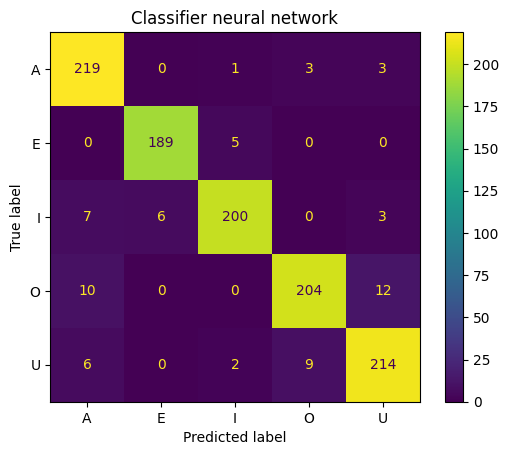

In [25]:
y1_pred = clf1.predict(X1_test)
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred)
plt.title('Classifier neural network')
plt.show()

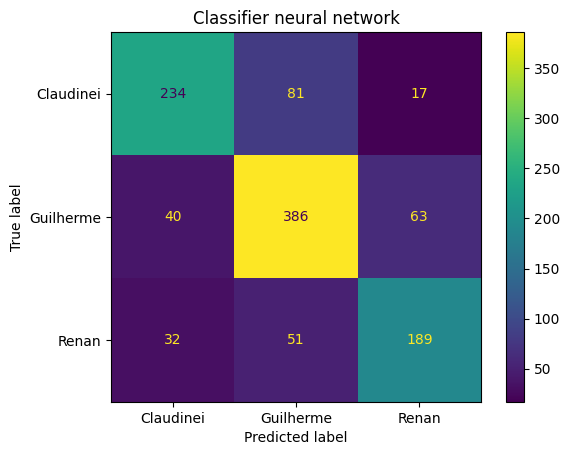

In [26]:
y2_pred = clf2.predict(X2_test)
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred)
plt.title('Classifier neural network')
plt.show()

In [27]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           A       0.90      0.97      0.94       226
           E       0.97      0.97      0.97       194
           I       0.96      0.93      0.94       216
           O       0.94      0.90      0.92       226
           U       0.92      0.93      0.92       231

    accuracy                           0.94      1093
   macro avg       0.94      0.94      0.94      1093
weighted avg       0.94      0.94      0.94      1093



In [28]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

   Claudinei       0.76      0.70      0.73       332
   Guilherme       0.75      0.79      0.77       489
       Renan       0.70      0.69      0.70       272

    accuracy                           0.74      1093
   macro avg       0.74      0.73      0.73      1093
weighted avg       0.74      0.74      0.74      1093



### 2.2 Clustering

Libraries

In [29]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Convert groupDataframe to numpy array

In [30]:
aGroupDf = groupDataframe.iloc[:, :180].values
aGroupDf

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

Plot dendogram

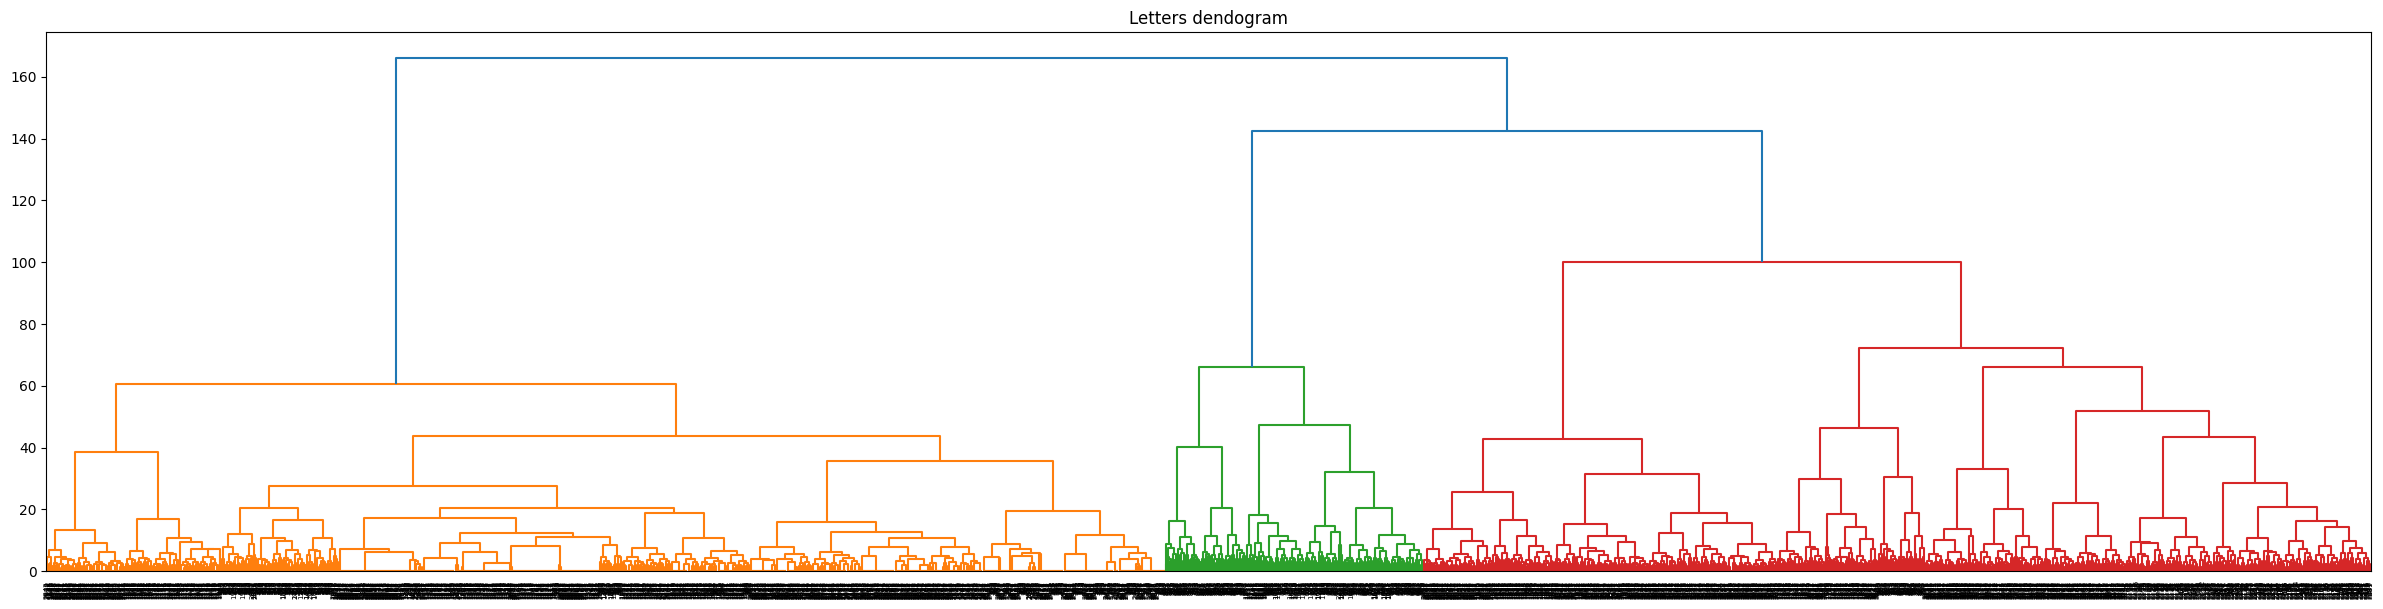

In [31]:
plt.figure(figsize=(30, 7))
plt.title("Letters dendogram")
dend = shc.dendrogram(shc.linkage(aGroupDf, method='ward'))

Clustering process

In [37]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
resultado_cluster=cluster.fit_predict(aGroupDf)

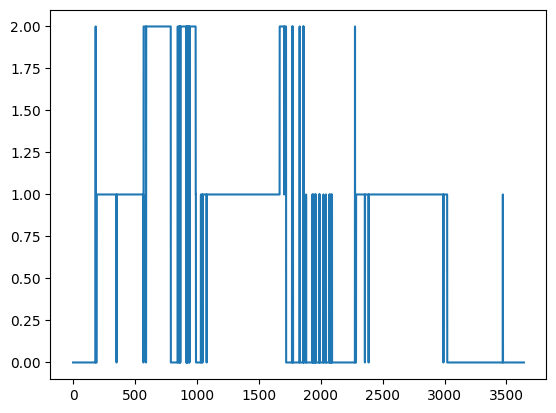

In [38]:
plt.plot(resultado_cluster)